# Car price prediction model
we have a dataset that contains some input features as listed below:
- Name : The brand and model of the car.
- Location : The location in which the car is available for purchase.
- Year : The year in which the car was released .
- Kilometers_Driven : The total distance driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner_Type : Whether the ownership is Firsthand, Second hand or other.
- Mileage : The standard mileage offered by the car company in kmpl or km/kg, for simplicity we will convert all values to kmpl.
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model.

Our main goal to predict the reselling price of an used car based on this data-set.  
Price : The price of the used car in INR Lakhs


## Steps for machine learning :
1. Data Gathering. 
2. Data Pre-Processing .
3. Choosing a Model.
4. Train the Model.
5. Data Evalution and Testing .


## 1.Data Gathering   
This data was downloaded from Here:https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv

The file which will be worked on is  train-data.csv that will be used for training and testing .

## 2. Data Pre-Processing 

In [1]:
#We will import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


we have an unnamed index column , we will use it for indexing.

In [2]:
data = pd.read_csv('train-data.csv', index_col = 'Unnamed: 0')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB
None


The column 'New_Price' should be removed as it contains an excessive number of null values and is unnecessary for our intended use.


In [3]:
data.drop('New_Price', axis = 1, inplace= True)

### Name


In [4]:
print(data['Name'].value_counts())

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64


 The Name column has too many values to sort, we seperate it into two columns : Brand and Model .change this sentence slightly

In [5]:
data['Brand'] = data.Name.str.split(' ').str[0]
data['Model'] = data.Name.str.split(' ').str[1]

### Brand

In [6]:
print(data['Brand'].value_counts())

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64


#### Data conversion

We will convert the columns containing data in string format to `int64` format in order to apply our algorithms.

In [7]:
le = LabelEncoder()
data['Brand'] = le.fit_transform(data['Brand'])

### Model
Drop the Name and Model columns as they have too many variables to process.


In [8]:
data.drop(columns=["Name",'Model'],inplace = True)

### Seats 



In [9]:
data['Seats'].value_counts() 

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

Removing the car data containing 0 seats

In [10]:
data[data['Seats'] ==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0,1


In [11]:
data.drop(index= 3999 , inplace=True)

### Engine and Power
We will remove the unit suffixes in order to derive the values in `int64` format

In [12]:
def convert_to_float(x):
    try:
        x = x.split(' ')[0]
        if isinstance(x, str):
            return float(x)
    except:
        return 0

data['Engine'] = data['Engine'].apply(convert_to_float)
data['Power'] = data['Power'].apply(convert_to_float)

### Mileage

We will remove unit suffixes and conver them to `int64` format. We will also convert the values experessed in km/kg to km/l


In [13]:
def convert(x):
    if str(x).endswith("km/kg"):
        return float(x.split(' ')[0])*0.74
    elif str(x).endswith("kmpl"):
        return float(x.split(' ')[0])
    
data['Mileage'] = data['Mileage'].apply(convert)


### Owner Type, Transmission, Fuel Type

We will convert the string values into `int64` format using a dictionary in the replace() function.

In [14]:
data['Owner_Type'] = data['Owner_Type'].replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})
data['Transmission'] = data['Transmission'].replace({'Manual': 0, 'Automatic': 1})
data['Fuel_Type'] = data['Fuel_Type'].replace({'Diesel': 0 , 'Petrol': 1, 'CNG': 2, 'LPG': 3 })

### Location

We will drop this column due to low impact on price

In [15]:
data.drop(['Location'], axis=1, inplace=True)

### Removing null values

In [16]:
data.isna().sum()
data.dropna(inplace=True)


# 3. Model training
We shall use a regression model to predict the price of the cars
Regression models used :
- Linear Regression
- Support Vector Regression (SVR)
- Decision Tree Regression
- Random Forest Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###  4. Train the model


In [18]:
y = data['Price']
x = data.drop(columns='Price')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=28)

#### Linear Regression

In [19]:
lr = LinearRegression(n_jobs=1000)
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_Test = lr.score(x_train,y_train)

#### Decision Tree

In [20]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_predict= dt.predict(x_test)
dt_Test = dt.score(x_train,y_train) 


#### Random Forest


In [21]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_Test = rf.score(x_train,y_train) 

## Data Evaluation and Testing


In [22]:
import matplotlib.pyplot as plt


Training Accuracy


<BarContainer object of 3 artists>

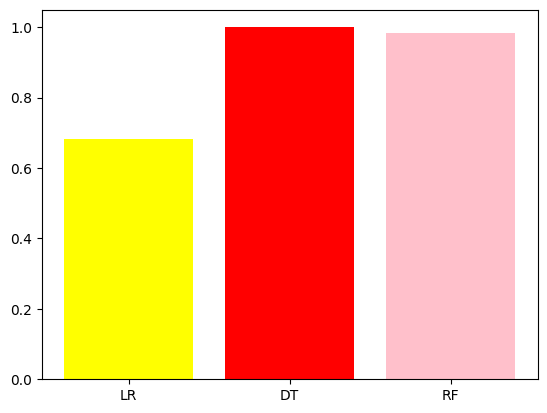

In [23]:
plt.bar(['LR', 'DT', 'RF'], height= [lr_Test, dt_Test, rf_Test], color= ['Yellow', 'Red', 'Pink'])

## Error Metrics Comparison

#### Mean Absolute Percentage Error


In [24]:
from sklearn.metrics import mean_absolute_percentage_error

<BarContainer object of 3 artists>

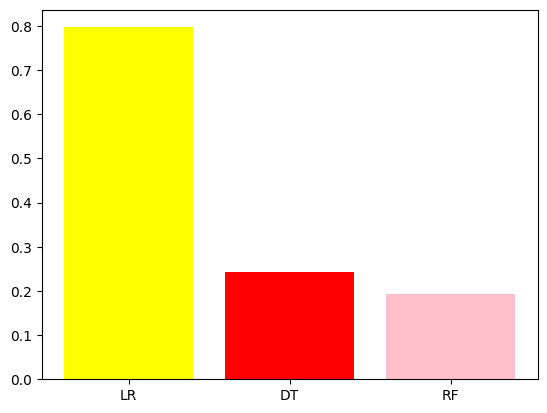

In [25]:
lrmape = mean_absolute_percentage_error(y_test, lr_predict )
dtmape = mean_absolute_percentage_error(y_test, dt_predict )
rfmape = mean_absolute_percentage_error(y_test, rf_predict )


plt.bar(['LR', 'DT', 'RF'], height= [lrmape, dtmape, rfmape], color= ['Yellow', 'Red', 'Pink'])

The Random Forest Model provides us with the least error percentage. Hence it is derived as the most appropriate model.

In [26]:


rf = RandomForestRegressor()
rf.fit(x_train,y_train)
newdata = pd.read_csv('newdata.csv', index_col='Unnamed: 0')
rf_predict = rf.predict(newdata)